In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.encoding import OrdinalEncoder
from sklearn.model_selection import train_test_split
plt.style.use("dark_background")

df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['age', 'fare']],
    df['survived'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((623, 2), (268, 2))

In [4]:
ort = X_train.mean().to_dict()
X_train.fillna(ort,inplace=True)
X_test.fillna(ort,inplace=True)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

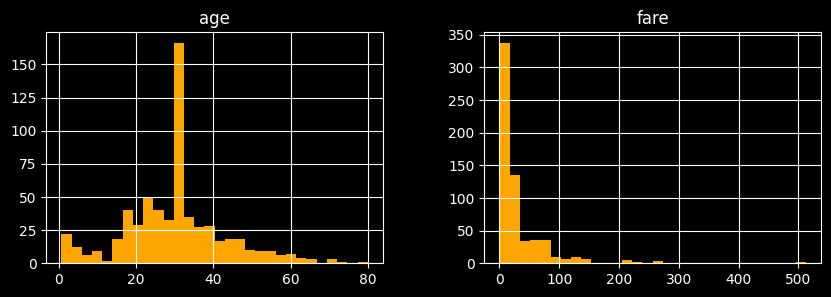

In [5]:
X_train.hist(bins=30,figsize=(10,3),color='orange')

In [6]:
disc = EqualFrequencyDiscretiser(q=10,variables=["age","fare"],return_object=True)
disc.fit(X_train)
train_t = disc.transform(X_train)
test_t = disc.transform(X_test)

In [7]:
train_t.dtypes

age     object
fare    object
dtype: object

In [8]:
train_t.head()

,age,fare
857,8,6
52,8,8
386,0,7
124,8,9
578,4,4


In [9]:
y_train.groupby(train_t["age"]).mean()

age
0    0.565217
1    0.289855
2    0.440000
3    0.356164
4    0.305785
5    0.472727
6    0.442623
7    0.292308
8    0.433333
Name: survived, dtype: float64

<Axes: xlabel='age'>

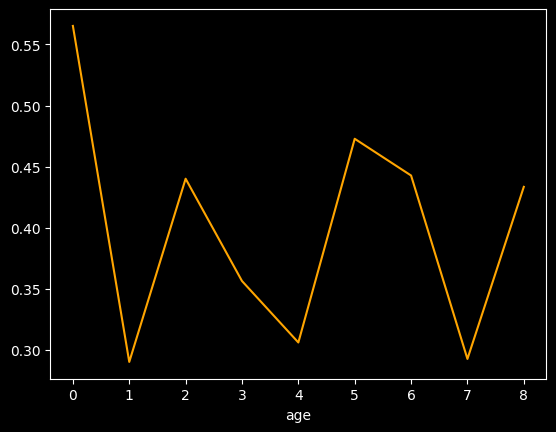

In [10]:
y_train.groupby(train_t["age"]).mean().plot(color = "orange")

<Axes: xlabel='fare'>

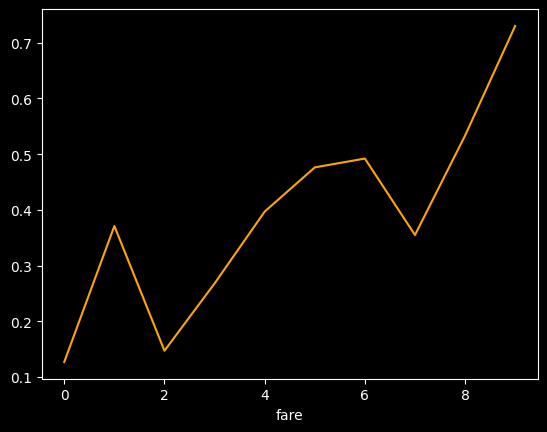

In [11]:
y_train.groupby(train_t["fare"]).mean().plot(color = "orange")

In [12]:
enc = OrdinalEncoder(encoding_method="ordered")
enc.fit(train_t,y_train)

train_t = enc.transform(train_t)
test_t = enc.transform(test_t)

In [13]:
enc.encoder_dict_

{'age': {1: 0, 7: 1, 4: 2, 3: 3, 8: 4, 2: 5, 6: 6, 5: 7, 0: 8},
 'fare': {0: 0, 2: 1, 3: 2, 7: 3, 1: 4, 4: 5, 5: 6, 6: 7, 8: 8, 9: 9}}

<Axes: xlabel='age'>

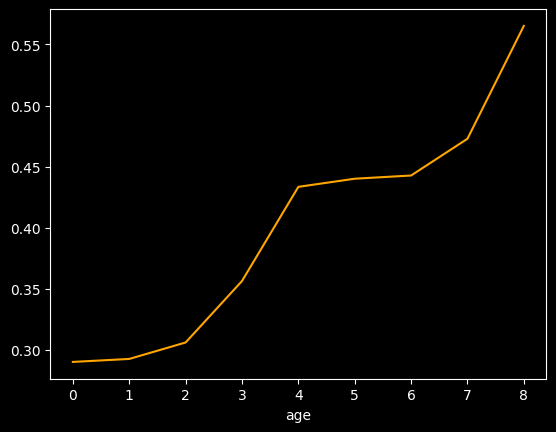

In [14]:
y_train.groupby(train_t["age"]).mean().plot(color = "orange")

<Axes: xlabel='age'>

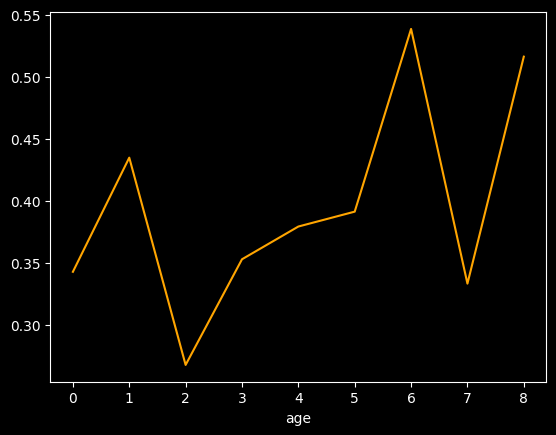

In [15]:
y_test.groupby(test_t["age"]).mean().plot(color = "orange")

<Axes: xlabel='fare'>

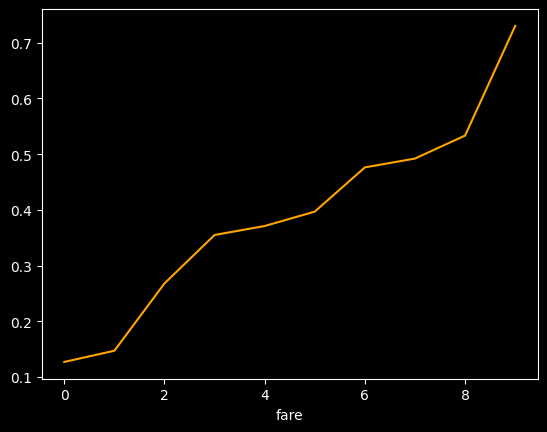

In [16]:
y_train.groupby(train_t["fare"]).mean().plot(color = "orange")

<Axes: xlabel='fare'>

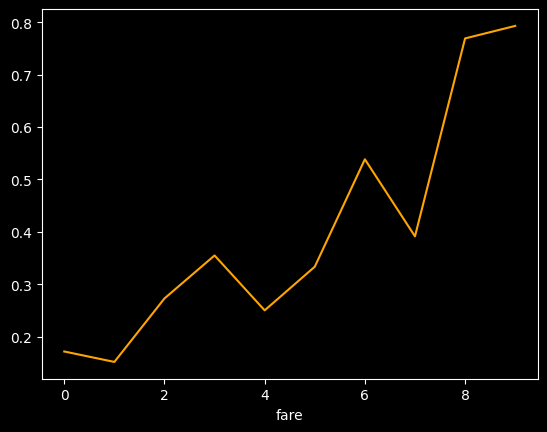

In [17]:
y_test.groupby(test_t["fare"]).mean().plot(color = "orange")